## Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

## Business Goal
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [196]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [197]:
df.keys()

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [198]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [199]:
## This dataset contains 205 rows and 26 columns
df.shape

(205, 26)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [201]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [202]:
## features with Object data type
object_data = [feature for feature in df.columns if df[feature].dtype == "O"]
object_data

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [203]:
## features with Numerical data type
num_data = [feature for feature in df.columns if df[feature].dtype != "O"]
num_data

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [204]:
## Finding missing values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [205]:
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
horsepower,-0.015006,0.070873,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139
peakrpm,-0.203789,0.273606,-0.360469,-0.287242,-0.220012,-0.320411,-0.266243,-0.244660,-0.254976,-0.067964,-0.435741,0.131073,1.000000,-0.113544,-0.054275,-0.085267
citympg,0.015940,-0.035823,-0.470414,-0.670909,-0.642704,-0.048640,-0.757414,-0.653658,-0.584532,-0.042145,0.324701,-0.801456,-0.113544,1.000000,0.971337,-0.685751
highwaympg,0.011255,0.034606,-0.544082,-0.704662,-0.677218,-0.107358,-0.797465,-0.677470,-0.587012,-0.043931,0.265201,-0.770544,-0.054275,0.971337,1.000000,-0.697599


In [206]:
price_data=df['price']
data = df.drop('price',axis=1)
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,six,145,idi,3.01,3.40,23.0,106,4800,26,27


In [208]:
# Create correlation matrix
corr_matrix = data.corr().abs()

In [209]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

<ipython-input-209-92e4951f08d8>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [210]:
# Find index of feature columns with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

In [211]:
to_drop

['carlength', 'curbweight', 'enginesize', 'highwaympg']

In [213]:
# Drop features 
data = data.drop(data[to_drop], axis=1)

In [214]:
data= pd.concat([data,price_data],axis=1)

In [215]:
## All the independent features having correlation values greater than 85 have
## been sorted out in the list and has kept only one column instead of keeping
## both the columns. Below is the updated dataframe with less columns.
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,dohc,four,mpfi,3.47,2.68,9.0,111,5000,21,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,dohc,four,mpfi,3.47,2.68,9.0,111,5000,21,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,ohcv,six,mpfi,2.68,3.47,9.0,154,5000,19,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,ohc,four,mpfi,3.19,3.40,10.0,102,5500,24,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,ohc,five,mpfi,3.19,3.40,8.0,115,5500,18,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,ohc,four,mpfi,3.78,3.15,9.5,114,5400,23,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,ohc,four,mpfi,3.78,3.15,8.7,160,5300,19,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,ohcv,six,mpfi,3.58,2.87,8.8,134,5500,18,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,ohc,six,idi,3.01,3.40,23.0,106,4800,26,22470.0


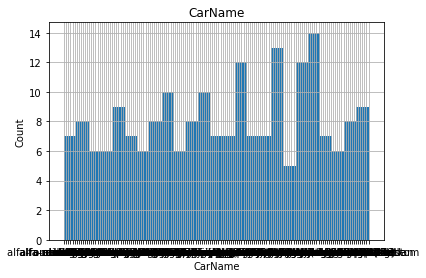

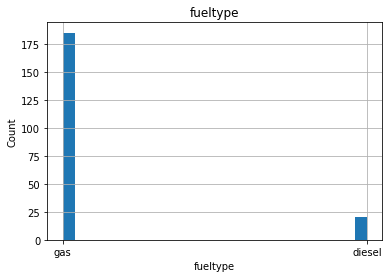

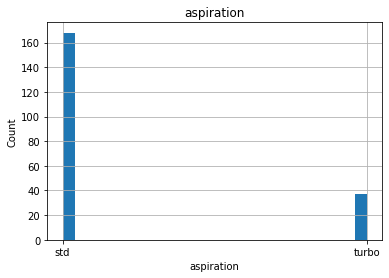

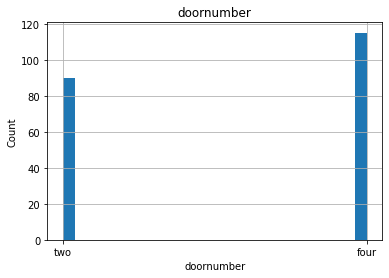

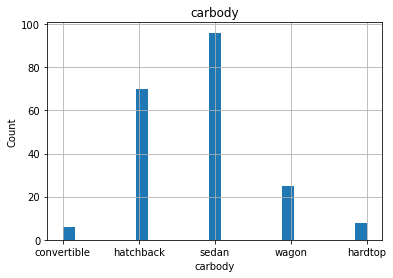

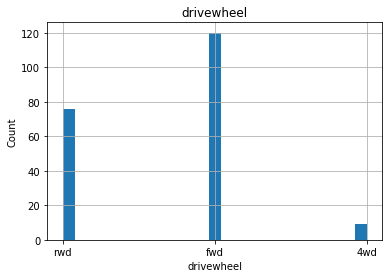

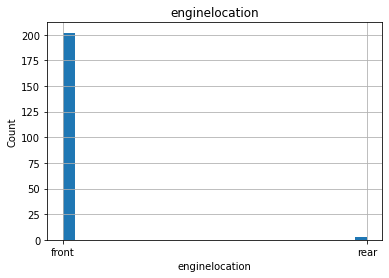

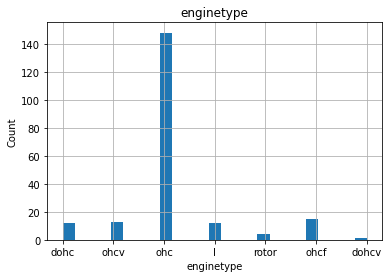

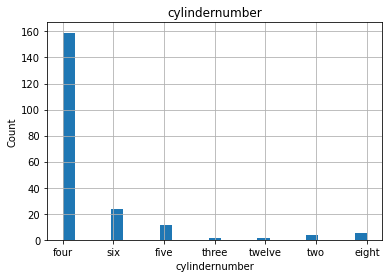

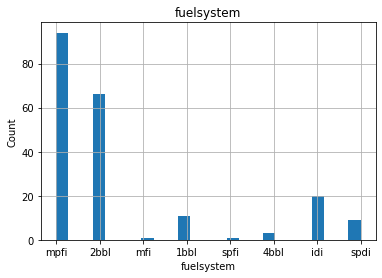

In [216]:
for feature in object_data:
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [218]:
numerical = [feature for feature in data.columns if data[feature].dtype != "O"]
numerical

['car_ID',
 'symboling',
 'wheelbase',
 'carwidth',
 'carheight',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'price']

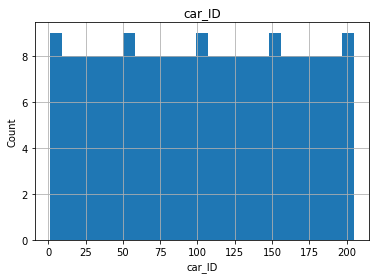

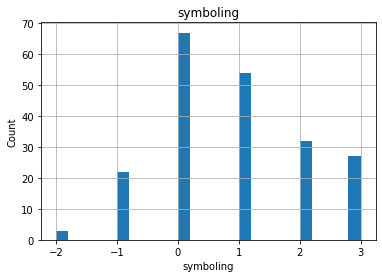

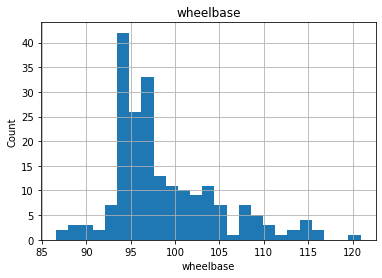

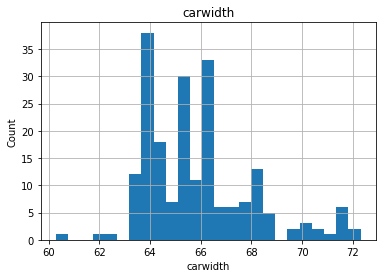

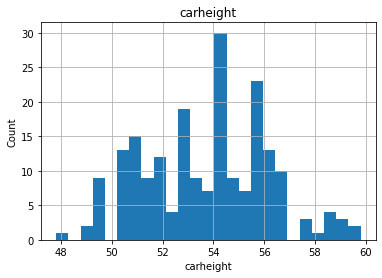

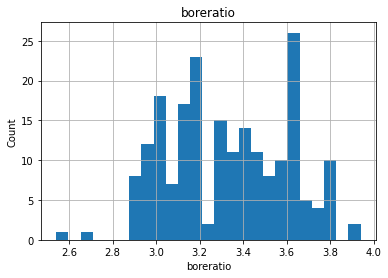

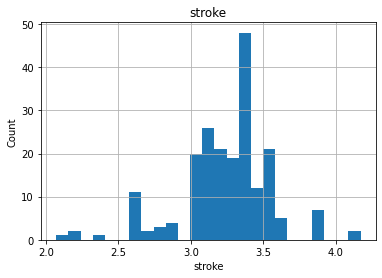

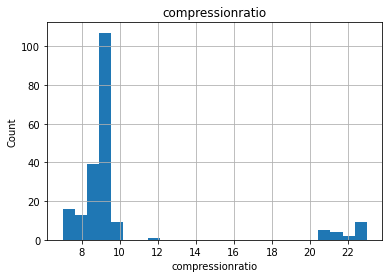

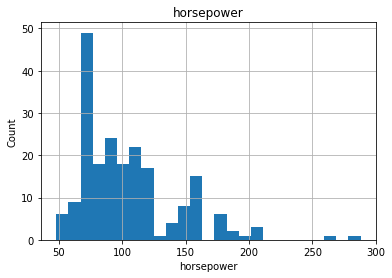

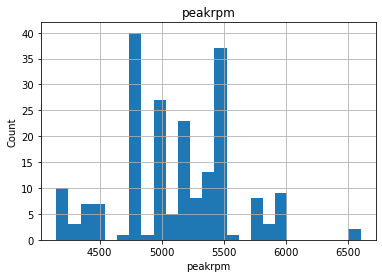

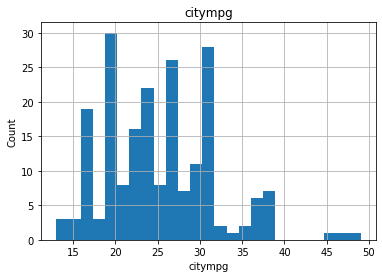

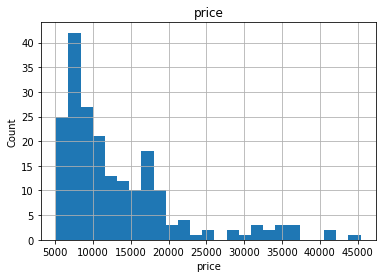

In [220]:
for feature in numerical:
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [221]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

<ipython-input-221-05bac12b86c2>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,car_ID,symboling,wheelbase,carwidth,carheight,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
car_ID,NaN,0.151621,0.129729,0.052387,0.255960,0.260064,0.160824,0.150276,0.015006,0.203789,0.015940,0.109093
symboling,NaN,NaN,0.531954,0.232919,0.541038,0.130051,0.008735,0.178515,0.070873,0.273606,0.035823,0.079978
wheelbase,NaN,NaN,NaN,0.795144,0.589435,0.488750,0.160959,0.249786,0.353294,0.360469,0.470414,0.577816
carwidth,NaN,NaN,NaN,NaN,0.279210,0.559150,0.182942,0.181129,0.640732,0.220012,0.642704,0.759325
carheight,NaN,NaN,NaN,NaN,NaN,0.171071,0.055307,0.261214,0.108802,0.320411,0.048640,0.119336
...,...,...,...,...,...,...,...,...,...,...,...,...
compressionratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204326,0.435741,0.324701,0.067984
horsepower,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.131073,0.801456,0.808139
peakrpm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.113544,0.085267
citympg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.685751


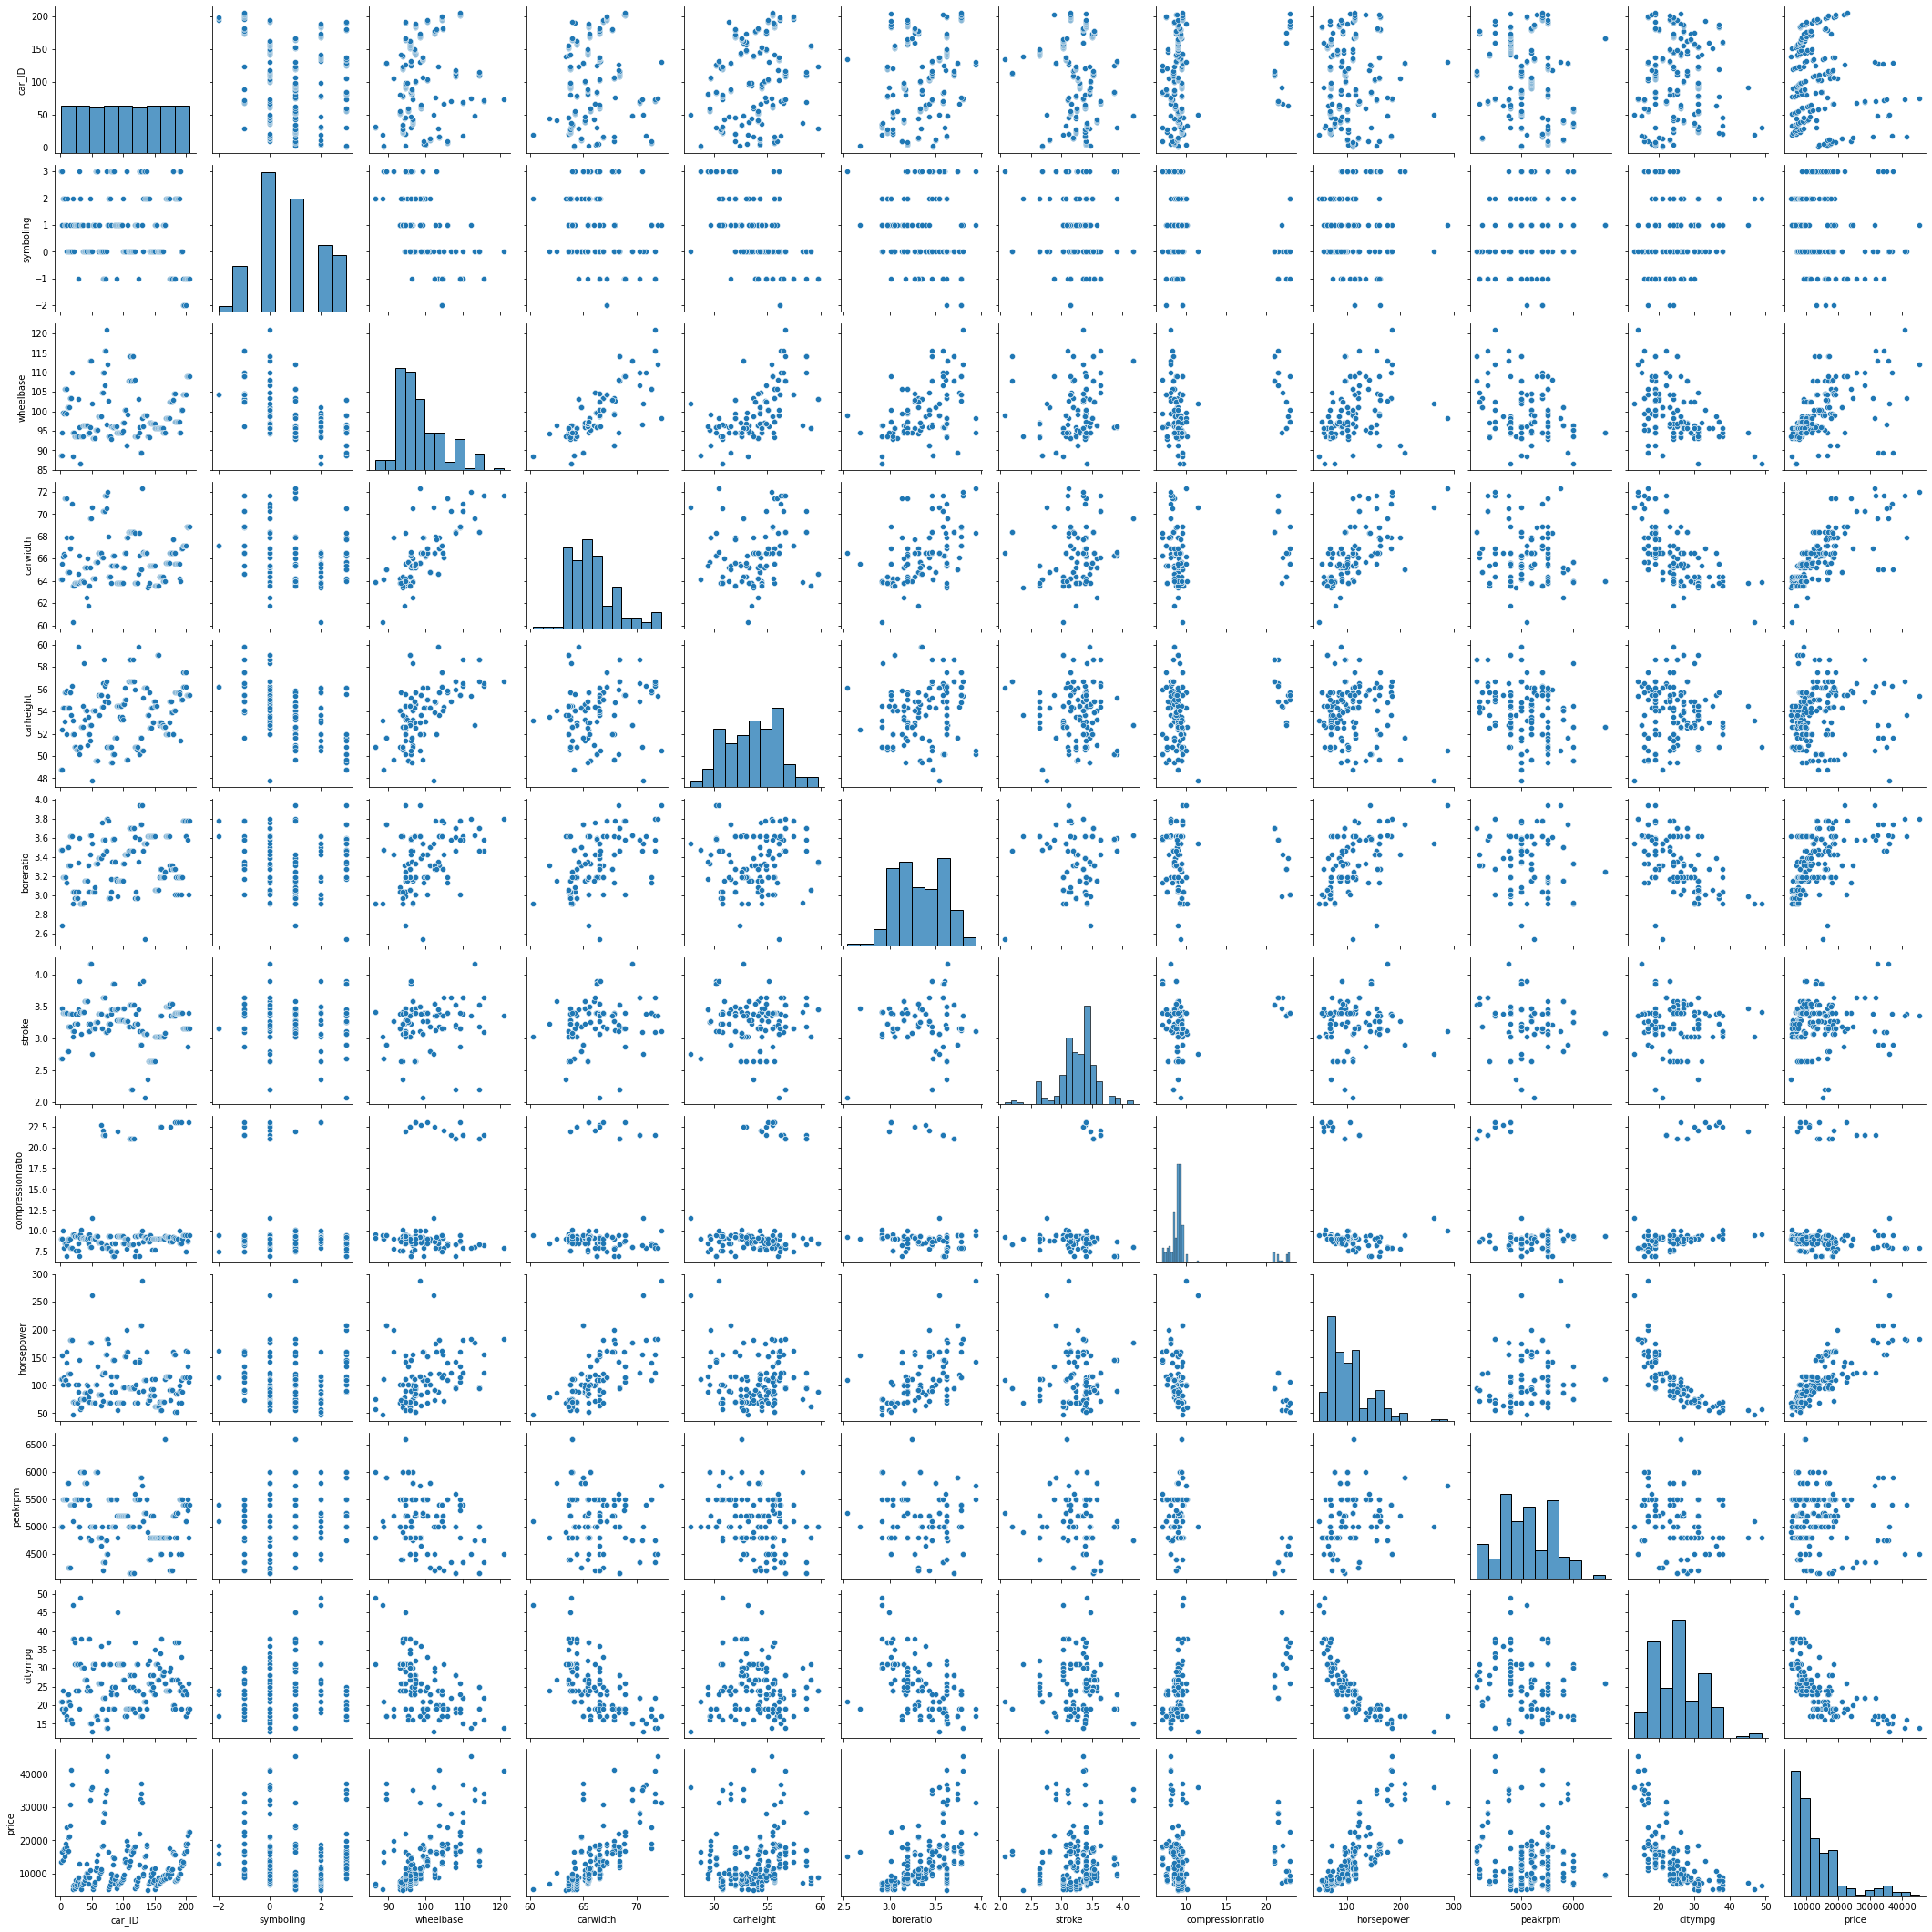

In [222]:
sns.pairplot(data)

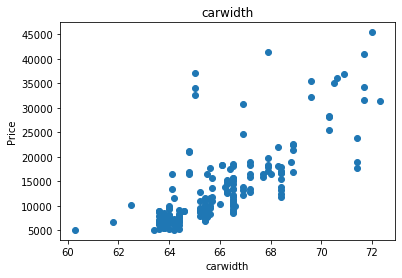

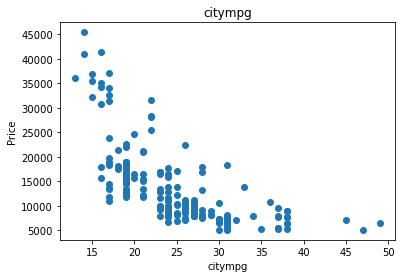

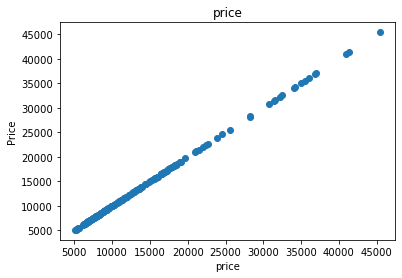

In [223]:
## plotting the features w.r.t. price having correlation greater 65.
linearly_correlated_columns = [column for column in upper.columns if any(upper[column] > 0.65)]
for feature in linearly_correlated_columns:
    plt.scatter(data[feature],data['price'])
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

1 plotting carwidth 
2 plotting citympg 
3 plotting price 


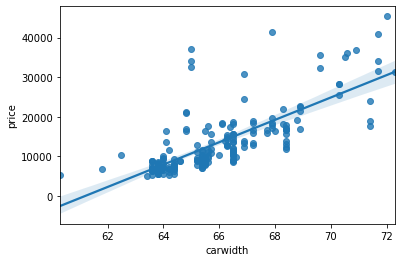

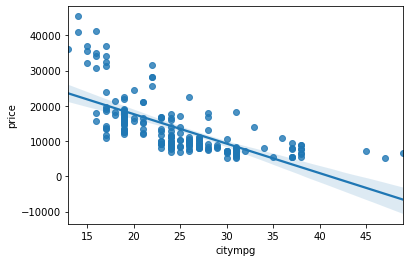

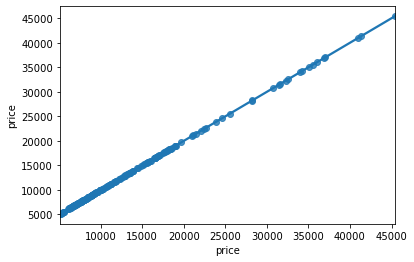

In [224]:
## plotting the features w.r.t. price having correlation greater 65.
## citympg is negaively correlated with price.
## carwidth is positively correlated 
## with price.
linearly_correlated_columns = [column for column in upper.columns if any(upper[column] > 0.65)]
for i, feature in enumerate(linearly_correlated_columns, 1):
    plt.figure()  # forces a new figure
    sns.regplot(data=data, x=feature, y='price')
    print("{} plotting {} ".format(i,feature))

In [225]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [226]:
for feature in object_data:
    data[feature] = le.fit_transform(data[feature])

In [227]:
## Encoded data 
## Converted all the categorical columns/features into numerical format
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,0,2,5,3.47,2.68,9.0,111,5000,21,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,0,2,5,3.47,2.68,9.0,111,5000,21,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,5,3,5,2.68,3.47,9.0,154,5000,19,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,3,2,5,3.19,3.40,10.0,102,5500,24,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,3,1,5,3.19,3.40,8.0,115,5500,18,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,0,0,3,2,0,109.1,...,3,2,5,3.78,3.15,9.5,114,5400,23,16845.0
201,202,-1,138,1,1,0,3,2,0,109.1,...,3,2,5,3.78,3.15,8.7,160,5300,19,19045.0
202,203,-1,140,1,0,0,3,2,0,109.1,...,5,3,5,3.58,2.87,8.8,134,5500,18,21485.0
203,204,-1,142,0,1,0,3,2,0,109.1,...,3,3,3,3.01,3.40,23.0,106,4800,26,22470.0


In [228]:
## Independent and Dependent features
x = data.drop(['car_ID','price'],axis=1)
y = data['price']

In [229]:
x.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carwidth,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg
0,3,2,1,0,1,0,2,0,88.6,64.1,48.8,0,2,5,3.47,2.68,9.0,111,5000,21
1,3,3,1,0,1,0,2,0,88.6,64.1,48.8,0,2,5,3.47,2.68,9.0,111,5000,21
2,1,1,1,0,1,2,2,0,94.5,65.5,52.4,5,3,5,2.68,3.47,9.0,154,5000,19
3,2,4,1,0,0,3,1,0,99.8,66.2,54.3,3,2,5,3.19,3.40,10.0,102,5500,24
4,2,5,1,0,0,3,0,0,99.4,66.4,54.3,3,1,5,3.19,3.40,8.0,115,5500,18


In [230]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [231]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [232]:
X_train

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carwidth,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg
177,-1,125,1,0,0,2,1,0,102.4,66.5,53.9,3,2,5,3.31,3.54,8.7,92,4200,27
75,1,62,1,1,1,2,2,0,102.7,68.0,54.8,3,2,5,3.78,3.12,8.0,175,5000,19
174,-1,113,0,1,0,3,1,0,102.4,66.5,54.9,3,2,3,3.27,3.35,22.5,73,4500,30
31,2,43,1,0,1,2,1,0,86.6,63.9,50.8,3,2,0,2.91,3.41,9.2,76,6000,31
12,0,11,1,0,1,3,2,0,101.2,64.8,54.3,3,3,5,3.31,3.19,9.0,121,4250,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,70,1,0,1,2,2,0,99.2,67.9,49.7,5,3,5,3.43,3.27,9.0,160,5200,19
14,1,15,1,0,0,3,2,0,103.5,66.9,55.7,3,3,5,3.31,3.19,9.0,121,4250,20
92,1,76,1,0,0,3,1,0,94.5,63.8,54.5,3,2,1,3.15,3.29,9.4,69,5200,31
179,3,120,1,0,1,2,2,0,102.9,67.7,52.0,0,3,5,3.27,3.35,9.3,161,5200,19


In [233]:
X_test

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carwidth,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg
15,0,13,1,0,0,3,2,0,103.5,66.9,55.7,3,3,5,3.62,3.390,8.00,182,5400,16
9,0,8,1,1,1,2,0,0,99.5,67.9,52.0,3,1,5,3.13,3.400,7.00,160,5500,16
100,0,79,1,0,0,3,1,0,97.2,65.2,54.7,3,2,1,3.33,3.470,8.50,97,5200,27
132,3,101,1,0,1,2,1,0,99.1,66.5,56.1,3,2,5,3.54,3.070,9.31,110,5250,21
68,-1,17,0,1,0,4,2,0,110.0,70.3,58.7,3,1,3,3.58,3.640,21.50,123,4350,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,3,54,1,0,1,2,2,0,95.3,65.7,49.6,6,6,2,3.33,3.255,9.40,101,6000,17
128,3,96,1,0,1,0,2,1,89.5,65.0,51.6,4,3,5,3.74,2.900,9.50,207,5900,17
76,2,65,1,0,1,2,1,0,93.7,64.4,50.8,3,2,1,2.97,3.230,9.40,68,5500,37
144,0,108,1,0,0,3,0,0,97.0,65.4,54.3,4,2,1,3.62,2.640,9.00,82,4800,24


In [234]:
## Always use Scaler methods after train test split, 
## if scaler method is used before train test split then data leakage can happen.
## Standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [235]:
X_train = scaler.fit_transform(X_train)

In [236]:
X_test = scaler.transform(X_test)

In [237]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [238]:
X_train

array([[-1.5       ,  1.14282808,  0.30265996, ..., -0.34075625,
        -1.96616697,  0.37011796],
       [ 0.125     , -0.36658963,  0.30265996, ...,  1.7237848 ,
        -0.31833179, -0.98698122],
       [-1.5       ,  0.85531994, -3.30403793, ..., -0.81336203,
        -1.34822878,  0.87903015],
       ...,
       [ 0.125     , -0.03116347,  0.30265996, ..., -0.91285799,
         0.093627  ,  1.04866755],
       [ 1.75      ,  1.02303302,  0.30265996, ...,  1.37554896,
         0.093627  , -0.98698122],
       [-0.6875    , -0.12699951,  0.30265996, ...,  1.15168307,
         0.093627  , -1.32625602]])

In [239]:
X_test

array([[-0.6875    , -1.54058117,  0.30265996, ...,  1.89790272,
         0.50558579, -1.49589342],
       [-0.6875    , -1.66037623,  0.30265996, ...,  1.35067497,
         0.71156519, -1.49589342],
       [-0.6875    ,  0.04071356,  0.30265996, ..., -0.21638631,
         0.093627  ,  0.37011796],
       ...,
       [ 0.9375    , -0.29471259,  0.30265996, ..., -0.93773197,
         0.71156519,  2.06649194],
       [-0.6875    ,  0.73552489,  0.30265996, ..., -0.58949613,
        -0.73029059, -0.13879423],
       [ 1.75      ,  0.1125906 ,  0.30265996, ...,  1.35067497,
         0.093627  , -0.98698122]])

#### Model Traning

In [240]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [241]:
regression.fit(X_train,y_train)

LinearRegression()

In [242]:
## printing the coefficient and the intercepts
print(regression.intercept_)

13408.503496503483


In [243]:
print(regression.coef_)

[  272.74683453 -1276.40086395  3814.39941794  -318.8128879
  -724.83330818 -1306.68280722   392.37663735  1379.32448881
  2493.11557347  1024.21826118   -74.18892035   486.91027211
  -652.40142945    -8.05166127  -294.67157757  -154.74876564
  4601.22716338  3879.12098188  -502.03436839 -1067.2528354 ]


In [244]:
## prediction with test data
reg_predict = regression.predict(X_test)
reg_predict

array([24236.43894999, 19973.41009681,  9939.76336955, 14592.88702476,
       24636.85232183,  6617.08370994,  7821.41397822,  6213.45710853,
        8722.00833665,  6302.70690426, 13815.36227236,  6512.10225529,
       17960.42207227, 13533.74650171, 38337.71004962,  6641.70284053,
       -2310.95453966, 14255.40045089,  9967.56989885, 10344.1677055 ,
       11298.85629527, 19812.11524135,  8730.49070913,  1320.99577369,
        7501.49283303, 23276.93275468, 15780.583541  , 13941.60855548,
        4904.12606162, 15250.769796  , 26164.05627396,  7097.19525684,
        3211.36801153, 20466.71748246,  7577.93541305, 26750.73844442,
        9364.4185023 , 12152.60899817,  6224.42009755, 14305.70500785,
        7481.06489749, 15427.7518104 , 17716.5089026 ,  3084.4525854 ,
        6457.59402894,  9996.32202146,  8870.91080583,  6909.84831746,
       16912.89122214, 15352.91192671,  7150.53838226, 20124.63510255,
        3346.73044448, 11772.21741741,  4751.21954878, 16151.47175739,
      

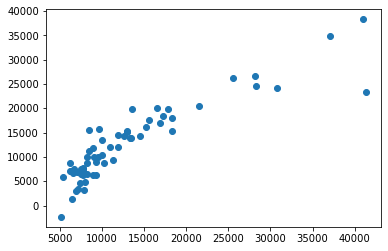

In [245]:
## plotting the scatter plot for the prediction
plt.scatter(y_test,reg_predict)

In [246]:
## Residuals
residuals = y_test - reg_predict
residuals

15     6523.561050
9     -2114.243097
100    -390.763370
132   -2742.887025
68     3611.147678
          ...     
56     -277.027696
128    2227.675514
76     -485.831413
144     202.882656
104   -1206.395029
Name: price, Length: 62, dtype: float64

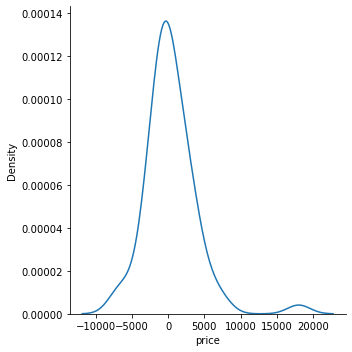

In [247]:
## plotting the residuals
sns.displot(residuals,kind="kde")

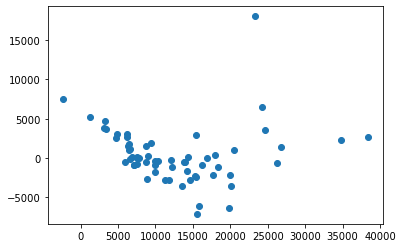

In [248]:
## scatter plotwith respect to prediction values and residuals
plt.scatter(reg_predict,residuals)

#### **R squared and adjusted R-Squared**

Formula

**R^2 = 1 - SSR/SST**

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [249]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_predict)
print(score)

0.8132788090760745


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [250]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.722195301308306

In [295]:
data3 = df

In [296]:
for feature in object_data:
    data3[feature] = le.fit_transform(data3[feature])

In [297]:
data2 = data3.drop(['car_ID','carlength', 'curbweight', 'enginesize', 'highwaympg'],axis=1)

In [298]:
data2 = data2.iloc[0,:-1]
data2

symboling              3.00
CarName                2.00
fueltype               1.00
aspiration             0.00
doornumber             1.00
carbody                0.00
drivewheel             2.00
enginelocation         0.00
wheelbase             88.60
carwidth              64.10
carheight             48.80
enginetype             0.00
cylindernumber         2.00
fuelsystem             5.00
boreratio              3.47
stroke                 2.68
compressionratio       9.00
horsepower           111.00
peakrpm             5000.00
citympg               21.00
Name: 0, dtype: float64

In [299]:
test_data = data2.values.tolist()
test_data

[3.0,
 2.0,
 1.0,
 0.0,
 1.0,
 0.0,
 2.0,
 0.0,
 88.6,
 64.1,
 48.8,
 0.0,
 2.0,
 5.0,
 3.47,
 2.68,
 9.0,
 111.0,
 5000.0,
 21.0]

In [301]:
scaler.transform([test_data])

array([[ 1.75      , -1.8041303 ,  0.30265996, -0.48245064,  1.12687234,
        -3.06329529,  1.19269983, -0.11909827, -1.70675464, -0.86869975,
        -2.01975858, -2.65126881, -0.14255361,  0.81213384,  0.55065806,
        -1.885228  , -0.26366829,  0.13184953, -0.31833179, -0.64770643]])

In [302]:
regression.predict(scaler.transform([test_data]))

array([15065.8726147])

#### Pickling the model file for deployment

In [303]:
import pickle
pickle.dump(regression,open('regmodel.pkl','wb'))

In [306]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [307]:
pickled_model.predict(scaler.transform([test_data]))

array([15065.8726147])